In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import datetime

In [3]:
!dir inputs

 Volume in drive D has no label.
 Volume Serial Number is F6A2-5568

 Directory of D:\PythonTraining\Trading\other_fx\inputs

2021/04/18  16:23    <DIR>          .
2021/04/18  16:23    <DIR>          ..
2021/04/18  16:22         2,573,622 EURGBP_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,576,106 EURJPY_M10_202003020000_202104162350.csv
2021/04/18  16:21         2,571,608 EURUSD_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,585,572 GBPJPY_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,578,380 GBPUSD_M10_202003020000_202104162350.csv
2021/04/18  15:32    <DIR>          m1
2021/04/18  16:23    <DIR>          m5
2021/04/18  16:22         2,571,975 USDJPY_M10_202003020000_202104162350.csv
               6 File(s)     15,457,263 bytes
               4 Dir(s)  466,180,263,936 bytes free


In [4]:
import pathlib

# y = {}
all_datasets = []

p_temp = pathlib.Path('inputs').glob('*.csv')
for p in p_temp:
    dataset = pd.DataFrame()
    
    curr = p.name.split('_')[0]
    tmp = pd.read_csv('inputs/' + p.name, sep='\t')
    dataset['<DATETIME>'] = tmp['<DATE>'] + ' ' + tmp['<TIME>']
#     y[curr] = tmp['<CLOSE>']
    dataset['<CLOSE>'] = tmp['<CLOSE>']
    dataset['<OPEN>'] = tmp['<OPEN>'].shift(1).fillna(0)
    dataset['<HIGH>'] = tmp['<HIGH>'].shift(1).fillna(0)
    dataset['<LOW>'] = tmp['<LOW>'].shift(1).fillna(0)
    
    for i in range(1, 13):
        dataset['shift%s'%i] = tmp['<CLOSE>'].shift(i)
    
#     dataset.drop(['<SPREAD>'], axis=1, inplace=True)
#     datasets[curr] = dataset

    # Calculate Simple Moving Average
    dataset['<20SMA>'] = dataset['shift1'].shift(1).rolling(20).mean().fillna(0)
    dataset['<50SMA>'] = dataset['shift1'].shift(1).rolling(50).mean().fillna(0)
    dataset['<100SMA>'] = dataset['shift1'].shift(1).rolling(100).mean().fillna(0)
    
    # Calculate diff of 5min ago
#     dataset['<5DIFF>'] = abs(dataset['shift1'] - dataset['shift1'].shift(5).fillna(0))
#     dataset['<5DIFF>'] = dataset['<CLOSE>'].shift(5).fillna(0)
    
    if len(all_datasets) == 0:
        all_datasets = dataset
    else:
#         all_datasets = pd.merge(all_datasets, datasets[curr], on='<DATETIME>', suffixes=['', '_' + curr], how='outer')
#         dataset.drop(['<DATE>', '<TIME>'], axis=1, inplace=True)
        all_datasets = pd.merge(all_datasets, dataset, on='<DATETIME>', suffixes=['', '_' + curr])
    
print(all_datasets)

                <DATETIME>  <CLOSE>   <OPEN>   <HIGH>    <LOW>   shift1  \
0      2020.03.02 00:00:00  0.86243  0.00000  0.00000  0.00000      NaN   
1      2020.03.02 00:10:00  0.86194  0.86263  0.86263  0.86085  0.86243   
2      2020.03.02 00:20:00  0.86105  0.86140  0.86254  0.86042  0.86194   
3      2020.03.02 00:30:00  0.86274  0.86194  0.86219  0.86085  0.86105   
4      2020.03.02 00:40:00  0.86213  0.86139  0.86274  0.86107  0.86274   
...                    ...      ...      ...      ...      ...      ...   
42121  2021.04.16 23:10:00  0.86575  0.86575  0.86599  0.86568  0.86570   
42122  2021.04.16 23:20:00  0.86569  0.86571  0.86579  0.86567  0.86575   
42123  2021.04.16 23:30:00  0.86569  0.86575  0.86577  0.86567  0.86569   
42124  2021.04.16 23:40:00  0.86569  0.86568  0.86572  0.86561  0.86569   
42125  2021.04.16 23:50:00  0.86556  0.86569  0.86583  0.86567  0.86569   

        shift2   shift3   shift4   shift5  ...  shift6_USDJPY  shift7_USDJPY  \
0          NaN     

In [5]:
all_datasets.columns.tolist()

['<DATETIME>',
 '<CLOSE>',
 '<OPEN>',
 '<HIGH>',
 '<LOW>',
 'shift1',
 'shift2',
 'shift3',
 'shift4',
 'shift5',
 'shift6',
 'shift7',
 'shift8',
 'shift9',
 'shift10',
 'shift11',
 'shift12',
 '<20SMA>',
 '<50SMA>',
 '<100SMA>',
 '<CLOSE>_EURJPY',
 '<OPEN>_EURJPY',
 '<HIGH>_EURJPY',
 '<LOW>_EURJPY',
 'shift1_EURJPY',
 'shift2_EURJPY',
 'shift3_EURJPY',
 'shift4_EURJPY',
 'shift5_EURJPY',
 'shift6_EURJPY',
 'shift7_EURJPY',
 'shift8_EURJPY',
 'shift9_EURJPY',
 'shift10_EURJPY',
 'shift11_EURJPY',
 'shift12_EURJPY',
 '<20SMA>_EURJPY',
 '<50SMA>_EURJPY',
 '<100SMA>_EURJPY',
 '<CLOSE>_EURUSD',
 '<OPEN>_EURUSD',
 '<HIGH>_EURUSD',
 '<LOW>_EURUSD',
 'shift1_EURUSD',
 'shift2_EURUSD',
 'shift3_EURUSD',
 'shift4_EURUSD',
 'shift5_EURUSD',
 'shift6_EURUSD',
 'shift7_EURUSD',
 'shift8_EURUSD',
 'shift9_EURUSD',
 'shift10_EURUSD',
 'shift11_EURUSD',
 'shift12_EURUSD',
 '<20SMA>_EURUSD',
 '<50SMA>_EURUSD',
 '<100SMA>_EURUSD',
 '<CLOSE>_GBPJPY',
 '<OPEN>_GBPJPY',
 '<HIGH>_GBPJPY',
 '<LOW>_GBPJPY',

In [6]:
all_datasets

,<DATETIME>,<CLOSE>,<OPEN>,<HIGH>,<LOW>,shift1,shift2,shift3,shift4,shift5,...,shift6_USDJPY,shift7_USDJPY,shift8_USDJPY,shift9_USDJPY,shift10_USDJPY,shift11_USDJPY,shift12_USDJPY,<20SMA>_USDJPY,<50SMA>_USDJPY,<100SMA>_USDJPY
0,2020.03.02 00:00:00,0.86243,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
1,2020.03.02 00:10:00,0.86194,0.86263,0.86263,0.86085,0.86243,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
2,2020.03.02 00:20:00,0.86105,0.86140,0.86254,0.86042,0.86194,0.86243,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
3,2020.03.02 00:30:00,0.86274,0.86194,0.86219,0.86085,0.86105,0.86194,0.86243,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
4,2020.03.02 00:40:00,0.86213,0.86139,0.86274,0.86107,0.86274,0.86105,0.86194,0.86243,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42121,2021.04.16 23:10:00,0.86575,0.86575,0.86599,0.86568,0.86570,0.86575,0.86593,0.86597,0.86613,...,108.783,108.770,108.793,108.764,108.778,108.787,108.788,108.78455,108.80266,108.81940
42122,2021.04.16 23:20:00,0.86569,0.86571,0.86579,0.86567,0.86575,0.86570,0.86575,0.86593,0.86597,...,108.782,108.783,108.770,108.793,108.764,108.778,108.787,108.78430,108.80370,108.81857
42123,2021.04.16 23:30:00,0.86569,0.86575,0.86577,0.86567,0.86569,0.86575,0.86570,0.86575,0.86593,...,108.793,108.782,108.783,108.770,108.793,108.764,108.778,108.78445,108.80394,108.81797
42124,2021.04.16 23:40:00,0.86569,0.86568,0.86572,0.86561,0.86569,0.86569,0.86575,0.86570,0.86575,...,108.788,108.793,108.782,108.783,108.770,108.793,108.764,108.78565,108.80468,108.81754


In [7]:
all_datasets.describe()

,<CLOSE>,<OPEN>,<HIGH>,<LOW>,shift1,shift2,shift3,shift4,shift5,shift6,...,shift6_USDJPY,shift7_USDJPY,shift8_USDJPY,shift9_USDJPY,shift10_USDJPY,shift11_USDJPY,shift12_USDJPY,<20SMA>_USDJPY,<50SMA>_USDJPY,<100SMA>_USDJPY
count,42126.000000,42126.000000,42126.000000,42126.000000,42125.000000,42124.000000,42123.000000,42122.000000,42121.000000,42120.000000,...,42120.000000,42119.000000,42118.000000,42117.000000,42116.000000,42115.000000,42114.000000,42126.000000,42126.000000,42126.000000
mean,0.891274,0.891252,0.891534,0.890973,0.891274,0.891275,0.891275,0.891276,0.891277,0.891277,...,106.307148,106.307089,106.307030,106.306971,106.306912,106.306853,106.306795,106.253528,106.176365,106.047657
std,0.018065,0.018578,0.018625,0.018535,0.018064,0.018064,0.018064,0.018064,0.018064,0.018063,...,1.885835,1.885818,1.885802,1.885785,1.885769,1.885753,1.885737,3.029740,4.147414,5.526629
min,0.847220,0.000000,0.000000,0.000000,0.847220,0.847220,0.847220,0.847220,0.847220,0.847220,...,101.355000,101.355000,101.355000,101.355000,101.355000,101.355000,101.355000,0.000000,0.000000,0.000000
25%,0.876390,0.876390,0.876610,0.876170,0.876390,0.876390,0.876390,0.876390,0.876390,0.876390,...,104.772000,104.772000,104.772000,104.772000,104.772000,104.772000,104.772000,104.759363,104.752760,104.744578
50%,0.895480,0.895480,0.895730,0.895250,0.895480,0.895480,0.895480,0.895480,0.895480,0.895480,...,106.137000,106.137000,106.137000,106.137000,106.137000,106.137000,106.137000,106.130925,106.132870,106.136365
75%,0.904510,0.904510,0.904787,0.904260,0.904510,0.904510,0.904510,0.904510,0.904510,0.904510,...,107.556000,107.556000,107.556000,107.556000,107.556000,107.556000,107.556000,107.554012,107.558535,107.560655
max,0.948760,0.948760,0.949900,0.947800,0.948760,0.948760,0.948760,0.948760,0.948760,0.948760,...,111.667000,111.667000,111.667000,111.667000,111.667000,111.667000,111.667000,111.536150,111.411280,111.346470


In [8]:
all_datasets.isnull().any()

<DATETIME>         False
<CLOSE>            False
<OPEN>             False
<HIGH>             False
<LOW>              False
                   ...  
shift11_USDJPY      True
shift12_USDJPY      True
<20SMA>_USDJPY     False
<50SMA>_USDJPY     False
<100SMA>_USDJPY    False
Length: 115, dtype: bool

In [9]:
all_datasets2 = all_datasets.iloc[100:]
all_datasets2

,<DATETIME>,<CLOSE>,<OPEN>,<HIGH>,<LOW>,shift1,shift2,shift3,shift4,shift5,...,shift6_USDJPY,shift7_USDJPY,shift8_USDJPY,shift9_USDJPY,shift10_USDJPY,shift11_USDJPY,shift12_USDJPY,<20SMA>_USDJPY,<50SMA>_USDJPY,<100SMA>_USDJPY
100,2020.03.02 16:40:00,0.87067,0.87141,0.87184,0.87106,0.87151,0.87141,0.87080,0.87023,0.87066,...,107.621,107.607,107.674,107.709,107.771,107.790,107.739,107.68680,107.92444,0.00000
101,2020.03.02 16:50:00,0.87081,0.87153,0.87161,0.87061,0.87067,0.87151,0.87141,0.87080,0.87023,...,107.681,107.621,107.607,107.674,107.709,107.771,107.790,107.68530,107.91274,107.92651
102,2020.03.02 17:00:00,0.87209,0.87065,0.87128,0.87038,0.87081,0.87067,0.87151,0.87141,0.87080,...,107.721,107.681,107.621,107.607,107.674,107.709,107.771,107.68745,107.89942,107.92581
103,2020.03.02 17:10:00,0.87129,0.87081,0.87232,0.87045,0.87209,0.87081,0.87067,0.87151,0.87141,...,107.770,107.721,107.681,107.621,107.607,107.674,107.709,107.68575,107.88556,107.92437
104,2020.03.02 17:20:00,0.87093,0.87209,0.87227,0.87123,0.87129,0.87209,0.87081,0.87067,0.87151,...,107.789,107.770,107.721,107.681,107.621,107.607,107.674,107.67340,107.86902,107.92139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42121,2021.04.16 23:10:00,0.86575,0.86575,0.86599,0.86568,0.86570,0.86575,0.86593,0.86597,0.86613,...,108.783,108.770,108.793,108.764,108.778,108.787,108.788,108.78455,108.80266,108.81940
42122,2021.04.16 23:20:00,0.86569,0.86571,0.86579,0.86567,0.86575,0.86570,0.86575,0.86593,0.86597,...,108.782,108.783,108.770,108.793,108.764,108.778,108.787,108.78430,108.80370,108.81857
42123,2021.04.16 23:30:00,0.86569,0.86575,0.86577,0.86567,0.86569,0.86575,0.86570,0.86575,0.86593,...,108.793,108.782,108.783,108.770,108.793,108.764,108.778,108.78445,108.80394,108.81797
42124,2021.04.16 23:40:00,0.86569,0.86568,0.86572,0.86561,0.86569,0.86569,0.86575,0.86570,0.86575,...,108.788,108.793,108.782,108.783,108.770,108.793,108.764,108.78565,108.80468,108.81754


In [10]:
all_datasets2.isnull().sum()

<DATETIME>         0
<CLOSE>            0
<OPEN>             0
<HIGH>             0
<LOW>              0
                  ..
shift11_USDJPY     0
shift12_USDJPY     0
<20SMA>_USDJPY     0
<50SMA>_USDJPY     0
<100SMA>_USDJPY    0
Length: 115, dtype: int64

# Make Predict model by LightGBM

In [11]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [12]:
y = all_datasets2['<CLOSE>']
X = all_datasets2.drop(['<DATETIME>', '<CLOSE>', '<CLOSE>_EURJPY', '<CLOSE>_EURUSD', '<CLOSE>_GBPJPY', '<CLOSE>_GBPUSD', '<CLOSE>_USDJPY'], axis=1)

In [13]:
X.shape

(42026, 108)

In [14]:
y.shape

(42026,)

In [15]:
X.columns.tolist()

['<OPEN>',
 '<HIGH>',
 '<LOW>',
 'shift1',
 'shift2',
 'shift3',
 'shift4',
 'shift5',
 'shift6',
 'shift7',
 'shift8',
 'shift9',
 'shift10',
 'shift11',
 'shift12',
 '<20SMA>',
 '<50SMA>',
 '<100SMA>',
 '<OPEN>_EURJPY',
 '<HIGH>_EURJPY',
 '<LOW>_EURJPY',
 'shift1_EURJPY',
 'shift2_EURJPY',
 'shift3_EURJPY',
 'shift4_EURJPY',
 'shift5_EURJPY',
 'shift6_EURJPY',
 'shift7_EURJPY',
 'shift8_EURJPY',
 'shift9_EURJPY',
 'shift10_EURJPY',
 'shift11_EURJPY',
 'shift12_EURJPY',
 '<20SMA>_EURJPY',
 '<50SMA>_EURJPY',
 '<100SMA>_EURJPY',
 '<OPEN>_EURUSD',
 '<HIGH>_EURUSD',
 '<LOW>_EURUSD',
 'shift1_EURUSD',
 'shift2_EURUSD',
 'shift3_EURUSD',
 'shift4_EURUSD',
 'shift5_EURUSD',
 'shift6_EURUSD',
 'shift7_EURUSD',
 'shift8_EURUSD',
 'shift9_EURUSD',
 'shift10_EURUSD',
 'shift11_EURUSD',
 'shift12_EURUSD',
 '<20SMA>_EURUSD',
 '<50SMA>_EURUSD',
 '<100SMA>_EURUSD',
 '<OPEN>_GBPJPY',
 '<HIGH>_GBPJPY',
 '<LOW>_GBPJPY',
 'shift1_GBPJPY',
 'shift2_GBPJPY',
 'shift3_GBPJPY',
 'shift4_GBPJPY',
 'shift5_GB

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [17]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [18]:
# LightGBM parameters
params = {
        'task' : 'train',
        'boosting':'gbdt',
        'objective' : 'regression',
        'metric' : {'mse'},
        'num_leaves':78,
        'drop_rate':0.05,
        'learning_rate':0.01,
        'seed':0,
        'verbose':0,
        'device': 'cpu'
}

In [19]:
evaluation_results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100000,
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['Train', 'Valid'],
                evals_result=evaluation_results,
                early_stopping_rounds=1000,
                verbose_eval=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040344 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 1000 rounds
[100]	Train's l2: 2.74263e-05	Valid's l2: 9.48804e-06
[200]	Train's l2: 3.85383e-06	Valid's l2: 1.42986e-06
[300]	Train's l2: 6.79689e-07	Valid's l2: 3.37567e-07
[400]	Train's l2: 2.41353e-07	Valid's l2: 1.99234e-07
[500]	Train's l2: 1.72304e-07	Valid's l2: 1.84095e-07
[600]	Train's l2: 1.5474e-07	Valid's l2: 1.8873e-07
[700]	Train's l2: 1.45823e-07	Valid's l2: 1.93643e-07
[800]	Train's l2: 1.3906e-07	Valid's l2: 1.9859e-07
[900]	Train's l2: 1.33094e-07	Valid's l2: 2.013e-07
[1000]	Train's l2: 1.28152e-07	Valid's l2: 2.16249e-07
[1100]	Train's l2: 1.23723e-07	Valid's l2: 2.18584e-07
[1200]	Train's l2: 1.19378e-07	Valid's l2: 2.22502e-07
[1300]	Train's l2: 1.15376e-07	Valid's l2: 2.34059e-07
[1400]	Train's l2: 1.11777e-07	Valid's l2: 2.35844e-07
[1500]	Train's l2

In [20]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [21]:
y_pred

array([0.88813677, 0.88815591, 0.88808359, ..., 0.86597481, 0.86597481,
       0.86597481])

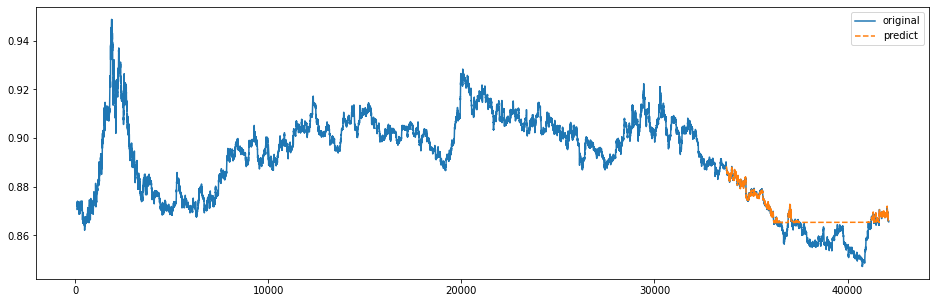

In [23]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

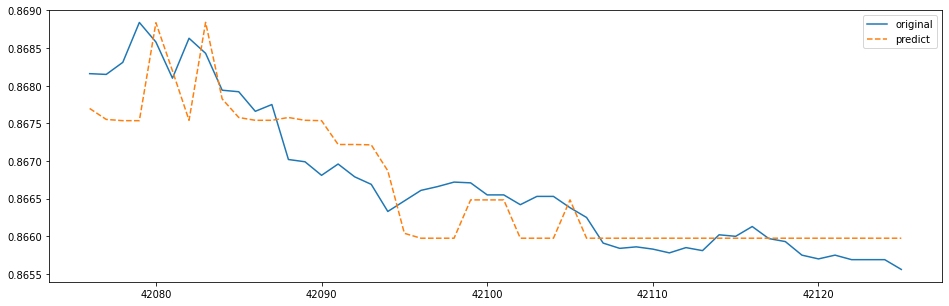

In [27]:
plt.figure(figsize=(16,5))
plt.plot(y[-50:], label='original')
plt.plot(y_[-50:], '--', label='predict')
plt.legend()